## Business requirement / Problem statement
Predict the insurance cost based on medical cost personal data

## Data
Data downloaded from Kaggle. You can find the data here:
https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download. The data contains 7 variables as defined below:

- age: age of primary beneficiary

- sex: insurance contractor gender, female, male

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- children: Number of children covered by health insurance / Number of dependents
- smoker: Indicator for smoking or not smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance : Response variable (Y)

## GOOGLE COLAB ONLY CODE
If you are working on google colab.

### Install libraries

In [55]:
!pip install -q seaborn==0.13.2
!pip install -q pandas==2.0.3
!pip install -q matplotlib==3.8.4
!pip install -q scikit-learn==1.4.2

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
import pandas as pd
# Load the dataset
# copy the data path and paste it here
datapath = "/content/drive/MyDrive/IntroToMLwithPython_ODSC_24/"
data = pd.read_csv(datapath+"insurance.csv")

## LOCAL NOTEBOOK

## Exploratory data analysis

In [4]:
# Python version Check
import sys
print(sys.version)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


In [5]:
# provide datapath
# datapath = "/myd//s.s/s/s/"

In [6]:
# Import required libraries
# import pandas as pd
# import seaborn as sns
# import matplotlib
# import matplotlib.pyplot as plt
# print(f"Pandas version: {pd.__version__}")
# print(f"seaborn version: {sns.__version__}")
# print(f"matplotlib version: {matplotlib.__version__}")

In [7]:
# Read data
# data = pd.read_csv(datapath+"insurance.csv")
# data.head(2)

In [58]:
# Extract top 5 records using head()
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [59]:
# Check data types
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [60]:
# Find number of rows and columns in the data
data.shape

(1338, 7)

In [61]:
# Count data
data.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [62]:
# Are there any missing values?: None
print(" Total Missing values in each variable")
data.isna().sum()

 Total Missing values in each variable


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [63]:
# What about the duplicates?
# Find duplicated rows based on all columns
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [64]:
# Drop duplicates
data1 = data.drop_duplicates()
len(data1)

1337

In [65]:
# Recheck duplicates on data1: None
data1[data1.duplicated()]

,age,sex,bmi,children,smoker,region,charges


In [66]:
# Get distribution
data1.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [67]:
# Average charges by gender
print("Average charges by gender")
data1.groupby(["sex"])["charges"].mean()

Average charges by gender


sex
female    12569.578844
male      13974.998864
Name: charges, dtype: float64

In [68]:
# Average charges by smoker
print("Average charges by smoker")
data1.groupby(["smoker"])["charges"].mean()

Average charges by smoker


smoker
no      8440.660307
yes    32050.231832
Name: charges, dtype: float64

In [69]:
print(data1.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


##### Histogram of charges

Charges vary widely, ranging from 1,121.87  to  63,770.43, with a mean around $13,270.42. The distribution is right-skewed, indicating that higher charges are less frequent but contribute significantly to the overall cost.

<Axes: >

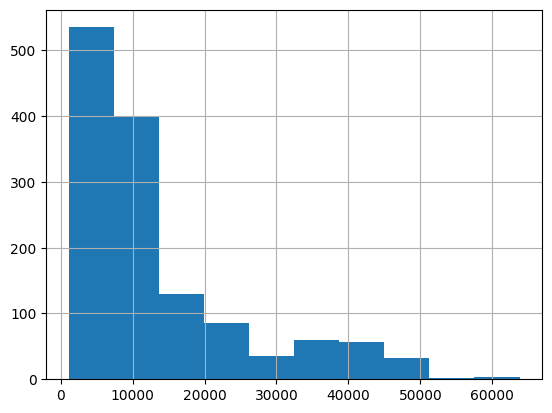

In [70]:
# Histogram of charges (y variable)
data1["charges"].hist()

In [71]:
data1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


###### Distribution of gender

It appears that the numbers are quite balanced between males and females, suggesting a good gender representation in this insurance data.The c

<ipython-input-72-09ffa7234d6b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=data1, palette=['orange', 'darkblue'])


<Axes: title={'center': 'Distribution of Gender'}, xlabel='sex', ylabel='count'>

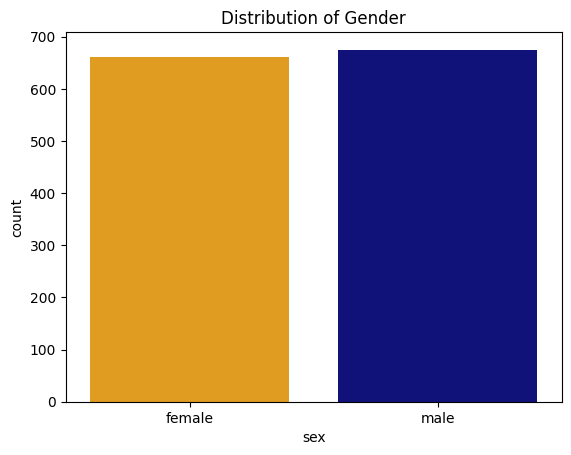

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
# Distribution of male and female
plt.title("Distribution of Gender")
# Create a count plot
sns.countplot(x='sex', data=data1, palette=['orange', 'darkblue'])

In [73]:
# Get the total
data1["sex"].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [74]:
print(sns.__version__)

0.13.2


###### Smoker
The count plot below illustrates the distribution of smokers within the dataset. There is a noticeable difference: the number of non-smokers substantially exceeds the number of smokers. This skew could be significant when considering the impact of smoking on insurance charges or health metrics in further analyses.

<ipython-input-75-5de3653d45b2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoker', data=data1, palette=['blue', 'orange'])


<Axes: title={'center': 'Distribution of somker'}, xlabel='smoker', ylabel='count'>

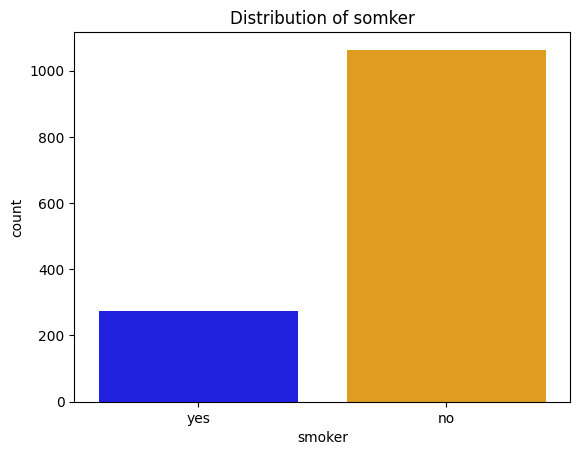

In [75]:
# Similarly for smoker
plt.title("Distribution of somker")
# Create a count plot
sns.countplot(x='smoker', data=data1, palette=['blue', 'orange'])

##### Region
This balanced distribution across regions is good for analysis, as it suggests that any findings related to region-specific trends or effects might not be due to large disparities in sample sizes.

<ipython-input-76-b21611f4042f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region', data=data1, palette=['blue', 'pink', 'darkgreen', 'brown'])


<Axes: title={'center': 'Distribution of region'}, xlabel='region', ylabel='count'>

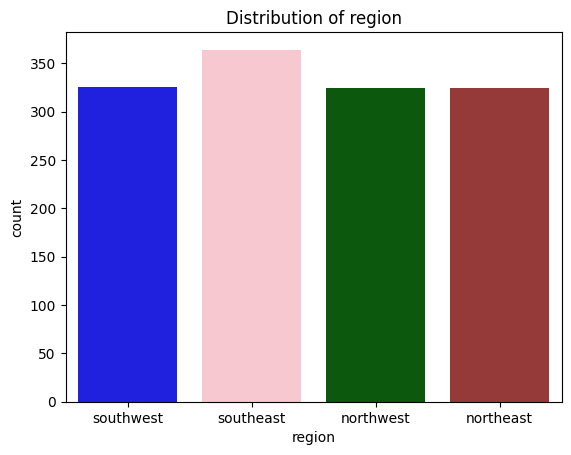

In [76]:
# Similarly for region
plt.title("Distribution of region")
sns.countplot(x='region', data=data1, palette=['blue', 'pink', 'darkgreen', 'brown'])

##### Average charges by gender
The bar plot above shows the average charges by gender, providing a clearer view of the differences between males and females in terms of insurance costs. On average, males incur higher charges than females.

<ipython-input-77-b2e9eee94e92>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(y="charges", x="sex", data=data1, palette=['orange', 'darkblue'], ci=None)
<ipython-input-77-b2e9eee94e92>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="charges", x="sex", data=data1, palette=['orange', 'darkblue'], ci=None)


Text(0.5, 1.0, 'Average insurance charges by Gender')

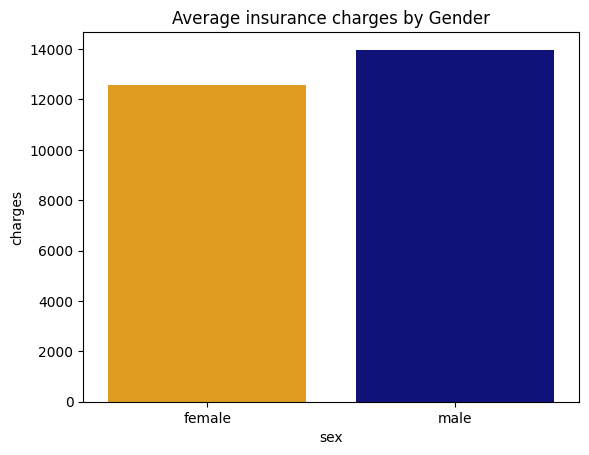

In [77]:
# barplot of charges by gender
sns.barplot(y="charges", x="sex", data=data1, palette=['orange', 'darkblue'], ci=None)
plt.title("Average insurance charges by Gender")

<ipython-input-78-052e3373dea1>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(y="charges", x="region", data=data1, ci=None)


Text(0.5, 1.0, 'Insurance charges by region')

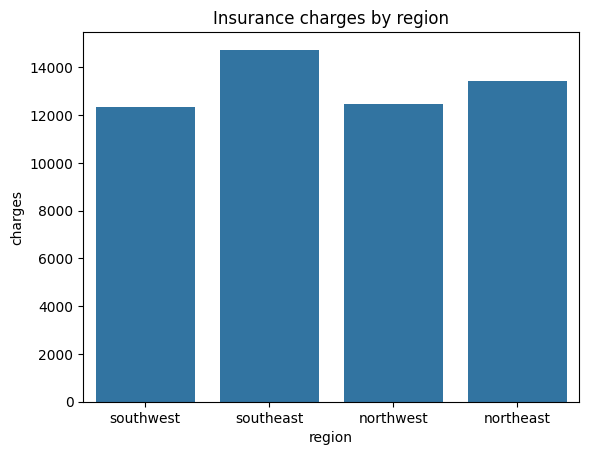

In [78]:
# barplot of charges by region
sns.barplot(y="charges", x="region", data=data1, ci=None)
plt.title("Insurance charges by region")

<ipython-input-30-39146f7d9c9e>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(y="charges", x="smoker", data=data1, ci=None)


Text(0.5, 1.0, 'Insurance charges by smoker')

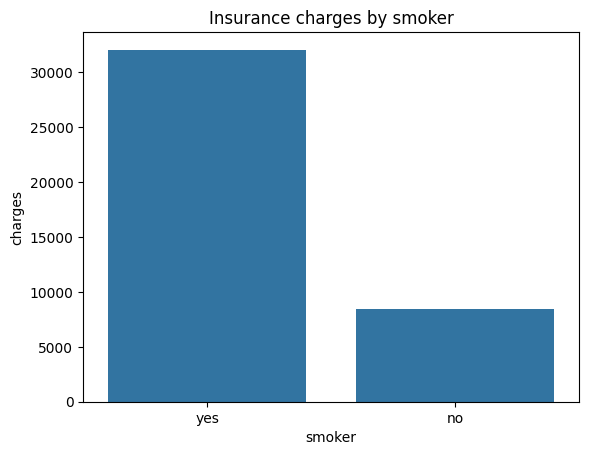

In [30]:
# barplot of charges by smoker
sns.barplot(y="charges", x="smoker", data=data1, ci=None)
plt.title("Insurance charges by smoker")

Text(30.958950617283932, 0.5, 'Charges')

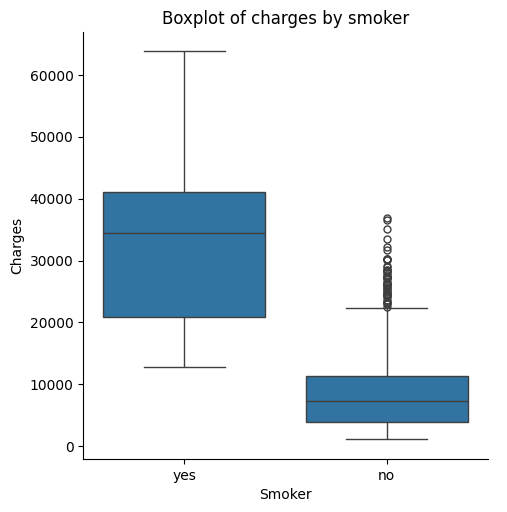

In [79]:
# boxplot:
sns.catplot(y="charges", x="smoker", kind="box", data=data1)
plt.title("Boxplot of charges by smoker")
plt.xlabel("Smoker")
plt.ylabel("Charges")

## Data preparation for modeling
- Convert data type: categories to numeric
- split data into train and test data sets

In [32]:
# Check data
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [80]:
# Convertn string variable to numeric :dummy encoding
# features
feature= data[["age", "sex", "bmi", "children","smoker", "region"]]
# response variable
y = data["charges"]

x = pd.get_dummies(feature, columns=["sex", "region", "smoker"], drop_first=True)
x.head()

,age,bmi,children,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes
0,19,27.900,0,False,False,False,True,True
1,18,33.770,1,True,False,True,False,False
2,28,33.000,3,True,False,True,False,False
3,33,22.705,0,True,True,False,False,False
4,32,28.880,0,True,True,False,False,False


In [81]:
y.head(2)

0    16884.9240
1     1725.5523
Name: charges, dtype: float64

In [35]:
# Train test split
from sklearn.model_selection import train_test_split

In [36]:
# Split data: 80% train, 20% test with a fixed random state for reproducibility
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [82]:
# Check the number of records in each data sets
print("Train data size: ", len(xtrain))
print("Test data size :", len(xtest))

Train data size:  1070
Test data size : 268


## Linear regression model
- import required libraries
- fit the linear regression model
- calculate the coefficients
- predict on test data
- evaluate the model


In multiple linear regression, the equation is an extension of the simple linear regression model to accommodate multiple predictor variables. The equation looks like this:

Y = β₀ + β₁X₁ + β₂X₂ + ... + βₙXₙ + ε

Where:

- `Y` is the dependent (target) variable you are trying to predict or explain.
- `β₀` is the intercept, the predicted value of `Y` when all `X` variables are zero.
- `β₁, β₂, ..., βₙ` are the coefficients. Each coefficient `βᵢ` represents the expected change in `Y` for a one-unit change in `Xᵢ`, holding all other predictors constant.
- `X₁, X₂, ..., Xₙ` are the independent (predictor) variables.
- `ε` is the error term, the part of `Y` the model can't explain, assumed to be random noise.

In this model, each predictor variable has its own coefficient that quantifies its relationship with the dependent variable, considering the presence of other predictors in the model.

Intercept: The intercept is the value of the target variable (y) when all the predictor variables (x) are zero. It's the point where the regression line crosses the y-axis.

Coefficient: A coefficient represents the change in the target variable for a one-unit change in a predictor variable, assuming all other variables are held constant. In a simple linear regression with one predictor, it's the slope of the regression line. In multiple linear regression with multiple predictors, each variable has its own coefficient.


### Import required libraries

In [83]:
# Model training
from sklearn.linear_model import LinearRegression

### Fit linear regression model on training data
`LinearRegression()` initializes an instance of the LinearRegression class and assigns it to the variable model. It creates a linear regression model that is ready to be trained.

`model.fit(xtrain, ytrain)` This line trains the linear regression model on the training data. Here, xtrain contains the feature variables (input data) and ytrain contains the target variable (output or response data) for the training set. The .fit() method adjusts the model parameters to minimize the difference between the predicted and actual values in ytrain, effectively 'learning' from the data.

In [84]:
# creating model object
model = LinearRegression()
# model fit
model.fit(xtrain, ytrain)

LinearRegression()

In [85]:
print(model.intercept_)

-11931.21905032667


In [41]:
print(model.coef_)

[ 2.56975706e+02  3.37092552e+02  4.25278784e+02 -1.85916916e+01
 -3.70677326e+02 -6.57864297e+02 -8.09799354e+02  2.36511289e+04]


In [86]:
coeffdata = pd.DataFrame(model.coef_, x.columns, columns=["Coefficient"])

In [87]:
coeffdata

,Coefficient
age,256.975706
bmi,337.092552
children,425.278784
sex_male,-18.591692
region_northwest,-370.677326
region_southeast,-657.864297
region_southwest,-809.799354
smoker_yes,23651.128856


### Use the model to predict on new data

In [88]:
ypred = model.predict(xtest)

In [89]:
df = pd.DataFrame({"Actual": ytest, "Predicted": ypred})
df

,Actual,Predicted
764,9095.06825,8969.550274
887,5272.17580,7068.747443
890,29330.98315,36858.410912
1293,9301.89355,9454.678501
259,33750.29180,26973.173457
...,...,...
109,47055.53210,39061.500932
575,12222.89830,11761.499198
535,6067.12675,7687.563632
543,63770.42801,40920.291512


### Evaluate the model

In [46]:
from sklearn import metrics
import numpy as np
print("Test model prediction")
print("Mean Absolute Error:", metrics.mean_absolute_error(ytest, ypred))
print("Mean Squared Error:", metrics.mean_squared_error(ytest, ypred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_absolute_error(ytest, ypred)))
print("R2:", metrics.r2_score(ytest, ypred))

Test model prediction
Mean Absolute Error: 4181.1944737536505
Mean Squared Error: 33596915.85136145
Root Mean Squared Error: 64.66215642672034
R2: 0.7835929767120724


Text(0, 0.5, 'Predicted')

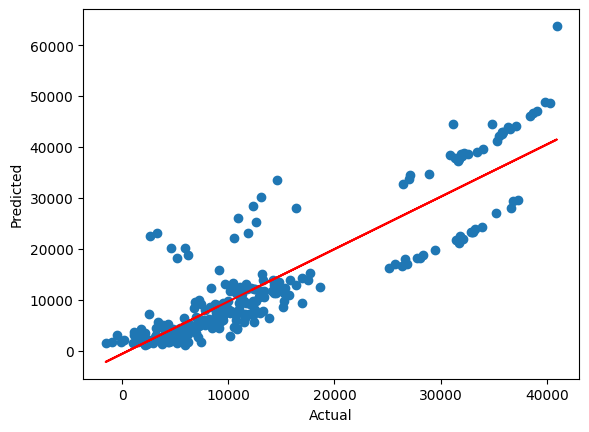

In [90]:
# Create predicted vs actual plot
plt.scatter(ypred, ytest)
m, b = np.polyfit(ypred, ytest, 1)
plt.plot(ypred, m*ypred + b, color = "r")
plt.xlabel("Actual")
plt.ylabel("Predicted")

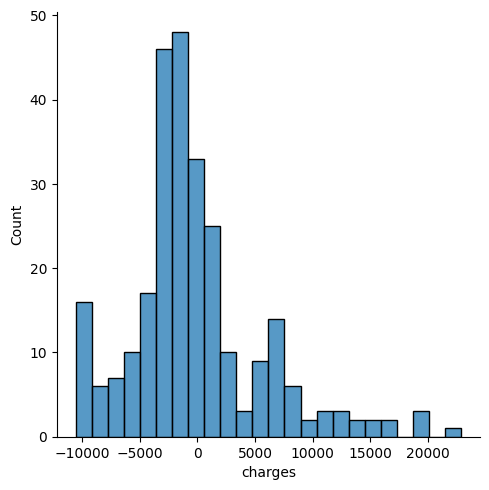

In [91]:
sns.displot((ytest-ypred))

## Random Forest Regression
It's an ensemble method that combines the prediction from multiple algorithms in order to make accurate predictions. It's a bagging method in which each model is fitted inependently and then aggregated outputs at the end. Random forest combines many decision trees into one model.

How RF works?:

1. First pick a random data points from the training data
2. Train decision tree model with those data points
3. Choose number of trees N and repeat step 1 and 2
4. While prediction, for each new data point, predict using each of the N trees and average the results

### Import required libarries

In [49]:
from sklearn.ensemble import RandomForestRegressor

### Fit RF regression model on training data

`RandomForestRegressor`: This is a type of machine learning model used for regression tasks, which operates by building multiple decision trees and merging their outputs.

`n_estimators=10`: This parameter specifies that the random forest should consist of 10 individual decision trees. More trees can lead to better performance but also require more computational resources and time to train.

`random_state`=90: This sets a seed for the random number generator that's used in the algorithm, ensuring reproducibility of the results. When you use the same random_state, you get the same results every time you run the code. This is useful for debugging or demonstration purposes.

In [92]:
rf = RandomForestRegressor(n_estimators=10, random_state=90)
rf.fit(xtrain, ytrain)

RandomForestRegressor(n_estimators=10, random_state=90)

### Use the model to predict on new data

In [93]:
ypred1 = rf.predict(xtest)

### Evaluate the model

In [94]:
print("Test model prediction")
print("Mean Absolute Error:", metrics.mean_absolute_error(ytest, ypred1))
print("Mean Squared Error:", metrics.mean_squared_error(ytest, ypred1))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_absolute_error(ytest, ypred1)))
print("R2:", metrics.r2_score(ytest, ypred1))

Test model prediction
Mean Absolute Error: 2577.4071852276124
Mean Squared Error: 21877369.500141904
Root Mean Squared Error: 50.76817098564427
R2: 0.8590818147760443


#### Feature importance
`rf.feature_importances_` in the context of a RandomForestRegressor model provides a measure of the importance or contribution of each feature in the prediction. It is an array where each value corresponds to a feature in the dataset:

Each number in the array represents the relative importance of a corresponding feature in making accurate predictions. Higher values mean the feature is more important.

In [95]:
rf.feature_importances_

array([0.13281329, 0.21239222, 0.0185588 , 0.00647208, 0.0059706 ,
       0.00675488, 0.00348142, 0.6135567 ])

Text(0.5, 0, 'Random Forest Feature Importance')

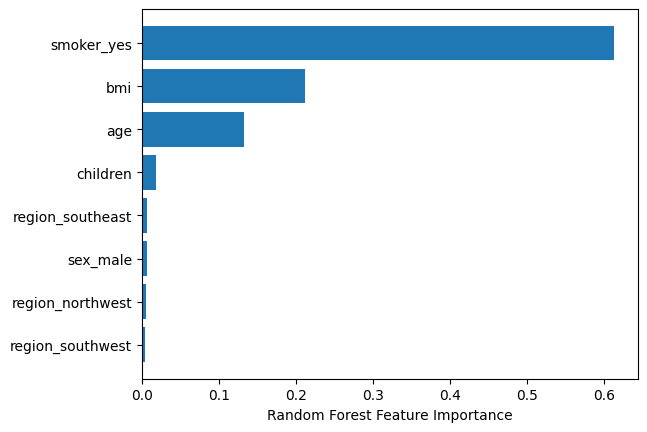

In [96]:
sorted_feature = rf.feature_importances_.argsort()
plt.barh(range(xtrain.shape[1]), rf.feature_importances_[sorted_feature])
plt.yticks(range(xtrain.shape[1]), xtrain.columns[sorted_feature])
plt.xlabel("Random Forest Feature Importance")

## Happy learning!!!